## Manifold testing for continuous case ambiguity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('..')
os.getcwd()

'd:\\FAU_Courses\\FAU Summer 2024\\Seminar\\Codes'

In [2]:
def generate_two_dimensional_data(num_samples_per_class):
    """Generate two dimentional data set for multiple classes"""
    np.random.seed(0)  

    # Class 0
    mean_0 = [0, 0]
    cov_0 = [[1, 0.5], [0.5, 1]] 
    class_0_data = np.random.multivariate_normal(mean_0, cov_0, num_samples_per_class)
    label_0 = np.zeros(num_samples_per_class)

    # Class 1
    mean_1 = [-2.5, 2.5]
    cov_1 = [[1, -0.5], [-0.5, 1]] 
    class_1_data = np.random.multivariate_normal(mean_1, cov_1, num_samples_per_class)
    label_1 = np.ones(num_samples_per_class)

    # Concatenate data and labels
    data = np.vstack((class_0_data, class_1_data))
    labels = np.concatenate((label_0, label_1))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['x1', 'x2'])
    df['class'] = labels

    return df

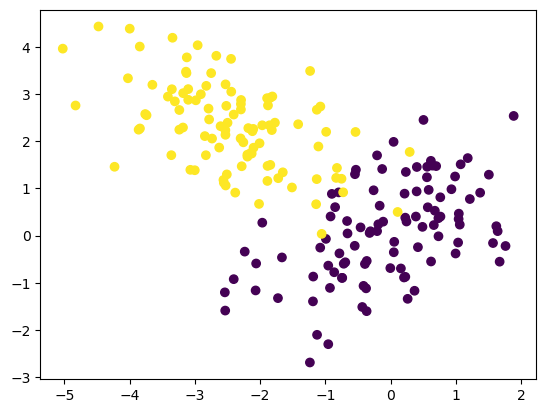

In [3]:
df = generate_two_dimensional_data(100)
plt.figure()
plt.scatter(df['x1'], df['x2'], c =df['class'])
plt.show()

In [4]:
# Caculate continuous case ambiguity using recatngular bounding box methods
from src.continuous import calculate_continuous_ambiguity
ambiguity, overlap_regions, samples_in_overlap = calculate_continuous_ambiguity(df, 'class')
ambiguity, overlap_regions, samples_in_overlap

(0.32999999999999996,
 [((0.0, 1.0),
   array([-2.54168126,  0.03537066]),
   array([0.29087077, 2.53776333]))],
 {'0.0-1.0': {0.0: 24, 1.0: 42}})

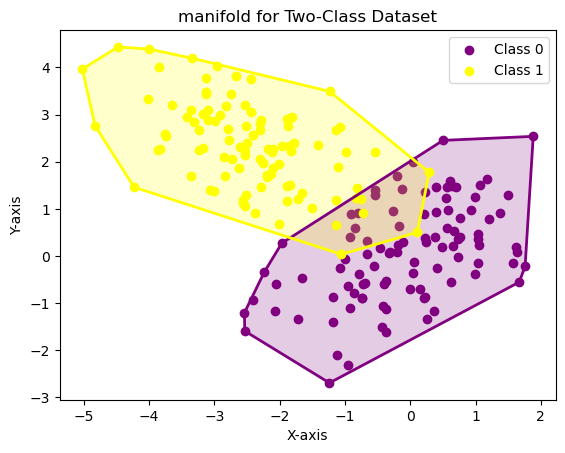

In [8]:
# Testing tighter bounding suraf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

np.random.seed(0)
class_0 = df[df['class']==0][['x1', 'x2']].values
class_1 = df[df['class']==1][['x1', 'x2']].values

def plot_convex_hull(points, ax, color):
    if len(points) >= 3:  # ConvexHull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], color=color, linewidth=2)
        ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=color, alpha=0.2)

fig, ax = plt.subplots()

ax.scatter(class_0[:, 0], class_0[:, 1], color='purple', label='Class 0')
plot_convex_hull(class_0, ax, color='purple')

ax.scatter(class_1[:, 0], class_1[:, 1], color='yellow', label='Class 1')
plot_convex_hull(class_1, ax, color='yellow')

# Add legend and show plot
ax.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('manifold for Two-Class Dataset')
plt.show()

In [ ]:
def calculate_ambiguity(df):
    class_0 = df[df['class']==0][['x1', 'x2']].values
    class_1 = df[df['class']==1][['x1', 'x2']].values 

    hull_0 = ConvexHull(class_0)
    hull_1 = ConvexHull(class_1)

    def points_in_hull(points, hull):
        coef = hull.equations[:, :-1]  # Convexhull.equations returns all the facets eqautions 
        const = hull.equations[:, -1]
        return np.all((np.dot(points, coef.T)+const) <=0, axis =1)
    
    class_0_overlap = class_0[points_in_hull(class_0, hull_1)]
    class_1_overlap = class_1[points_in_hull(class_1, hull_0)]

    class_0_counts = len(class_0_overlap)
    class_1_counts = len(class_1_overlap)

    ambiguity = .5*(class_0_counts/len(class_0) + class_1_counts/len(class_1))

    return ambiguity

ambiguity = calculate_ambiguity(df)

ambiguity     

0.095

In [18]:
len(class_0), len(class_1)

(100, 100)

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

hull = ConvexHull(class_0)
print(hull.equations)
print(len(hull.equations))


Equations of the facets (ax + by + cz + d <= 0):
[[ 0.59250093 -0.80556976 -1.43547499]
 [-0.06118108  0.99812668 -2.41773529]
 [-0.99989587 -0.01443064 -2.55880773]
 [-0.6470498  -0.76244774 -2.85451562]
 [ 0.99897709 -0.04521907 -1.76746214]
 [ 0.96520463 -0.26149573 -1.75596495]
 [-0.66170882  0.74976092 -1.50684246]
 [-0.9430421   0.33267341 -1.99598997]
 [-0.91602973  0.40111038 -1.91223695]]
9


array([[14, 32],
       [32, 77]])